# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

# [作業目標]
- 練習填入對應的欄位資料或公式, 完成題目的要求 

# [作業重點]
- 填入適當的輸入資料, 讓後面的程式顯示題目要求的結果 (Hint: 填入對應區間或欄位即可, In[4]~In[6], Out[4]~In[6])
- 填入z轉換的計算方式, 完成轉換後的數值 (Hint: 參照標準化公式, In[7])

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 設定 data_path
dir_data = 'D:/GitHub/3rd-ML100Days/data/'

In [3]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: D:/GitHub/3rd-ML100Days/data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [4]:
app_train['CNT_CHILDREN'].value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

In [15]:
#try
cut_rule = [0, 0.9, 2, 5, 19]
pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True)

[(-0.001, 0.9], (-0.001, 0.9], (-0.001, 0.9], (-0.001, 0.9], (-0.001, 0.9], ..., (-0.001, 0.9], (-0.001, 0.9], (-0.001, 0.9], (-0.001, 0.9], (-0.001, 0.9]]
Length: 307511
Categories (4, interval[float64]): [(-0.001, 0.9] < (0.9, 2.0] < (2.0, 5.0] < (5.0, 19.0]]

In [18]:
#1
"""
Your code here
"""
cut_rule = cut_rule = [0, 0.9, 2, 5, 19]
group_names = ['0 個小孩', '1 - 2 個小孩', '3 - 5 個小孩', '超過 5 個小孩']

app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True, labels=group_names)
app_train['CNT_CHILDREN_GROUP'].value_counts()

0 個小孩        215371
1 - 2 個小孩     87868
3 - 5 個小孩      4230
超過 5 個小孩         42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [30]:
#2-1
"""
Your code here
"""
grp = ['CNT_CHILDREN_GROUP']

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

CNT_CHILDREN_GROUP
0 個小孩        166288.713566
1 - 2 個小孩    174725.712648
3 - 5 個小孩    173626.303191
超過 5 個小孩     147910.714286
Name: AMT_INCOME_TOTAL, dtype: float64

E:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20491 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23567 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23401 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36229 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36942 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20491 missing from current font.
  font.set_text(s, 0, flags=flags)
E:\Anaconda3\lib\site-pa

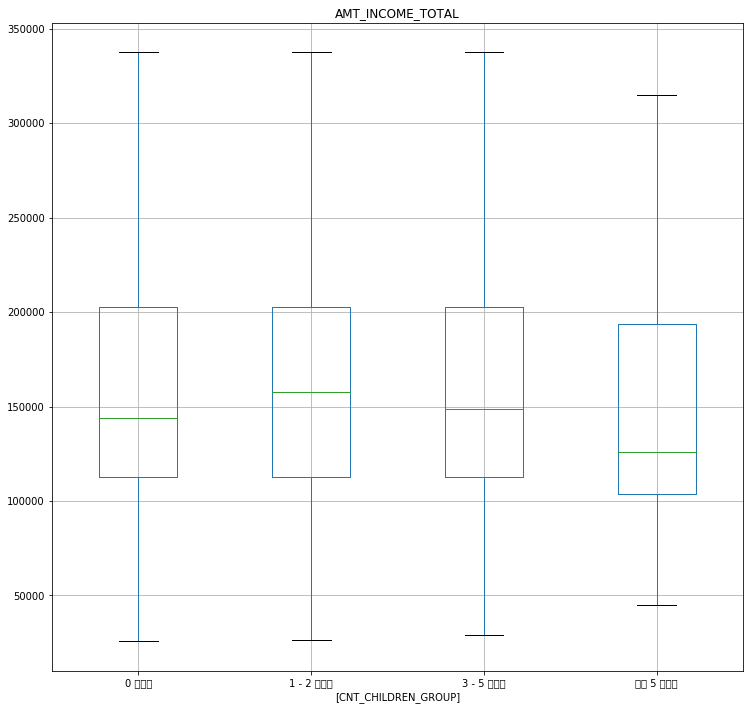

In [27]:
#2-2
"""
Your code here
"""
plt_column = ['AMT_INCOME_TOTAL']
plt_by = ['CNT_CHILDREN_GROUP']

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
#plt.xlabel("y軸", fontproperties="SimSun")
plt.show()

In [35]:
#try
grouped_df.groups

{'0 個小孩': Int64Index([     0,      1,      2,      3,      4,      5,      7,      8,
                  9,     11,
             ...
             307499, 307500, 307503, 307504, 307505, 307506, 307507, 307508,
             307509, 307510],
            dtype='int64', length=215371),
 '1 - 2 個小孩': Int64Index([     6,     10,     13,     17,     19,     21,     22,     24,
                 27,     33,
             ...
             307474, 307475, 307476, 307479, 307480, 307485, 307486, 307491,
             307494, 307502],
            dtype='int64', length=87868),
 '3 - 5 個小孩': Int64Index([    91,     92,    144,    180,    182,    365,    391,    426,
                438,    540,
             ...
             306299, 306439, 306888, 307033, 307250, 307293, 307329, 307387,
             307462, 307501],
            dtype='int64', length=4230),
 '超過 5 個小孩': Int64Index([  3079,   7204,  12615,  17516,  23881,  25669,  26195,  32717,
              34545,  42700,  46393,  72070,  76087,  78972,

In [38]:
#try
grouped_df.size()

CNT_CHILDREN_GROUP
0 個小孩        215371
1 - 2 個小孩     87868
3 - 5 個小孩      4230
超過 5 個小孩         42
Name: AMT_INCOME_TOTAL, dtype: int64

In [36]:
#3
"""
Your code here
"""
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda value: ( value - np.mean(value) ) / ( np.std(value) ))

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,0.345857
1,270000.0,0.990556
2,67500.0,-0.943540
3,135000.0,-0.298841
4,121500.0,-0.427781
